In [13]:
import numpy as np
from typing import List, Callable
import matplotlib.pyplot as plt
import scipy
import tqdm.auto as tqdm
import scipy.stats as st

XM = 15

In [82]:
def draw_pareto(num_samples: int, alpha: float, xm: float) -> np.ndarray:
    
    return (1 + np.random.pareto(a = alpha, size = num_samples)) * xm

def plot_histogram(data: np.ndarray, num_bins):
    
    plt.hist(data, bins = num_bins, density = False)
    plt.show()
    
def get_one_point_likelihood(x: float, xm: float) -> Callable:
    
    return lambda alpha: 0 if x < xm else np.log((alpha * xm**alpha)/(x**(alpha + 1)))

def get_sample_likelihood(sample: np.ndarray, xm: float) -> Callable:
    
    sum_likelihood = lambda alpha: np.sum([get_one_point_likelihood(x=x, xm = xm)(alpha = alpha) for x in sample])
    return sum_likelihood 

def get_maximum_likelihood_alpha(sample, initial, xm) -> float:
    
    negative_likelihood_func = lambda alpha: - (get_sample_likelihood(sample, xm = xm))(alpha = alpha)
    best_alpha = scipy.optimize.fmin(negative_likelihood_func, x0 = initial, maxiter = 1000000)
    return best_alpha


def plot_sample_likelihood_by_alpha(sample, xm):
    
    alphas = np.arange(0.05, 20, 0.05)
    likelihoods = []
    for alpha in tqdm.tqdm(alphas):
        
        likelihoods.append(get_sample_likelihood(sample, xm = xm)(alpha = alpha))

    plt.plot(alphas, likelihoods)
    plt.xlabel("alpha")
    plt.ylabel("log-likelihood")
    plt.show()

def calc_confidence_interval(xm, alpha, n = 100):
    
    alphas = []
    for i in tqdm.tqdm(range(n)):
        
        sample = draw_pareto(1000, alpha = alpha, xm = xm)
        alpha_max = get_maximum_likelihood_alpha(sample, initial = 6.96, xm = xm)
        alphas.append(alpha_max.item())
        
    # confidence = 0.95
    
    interval95 = st.t.interval(0.95, len(alphas)-1, loc=np.mean(alphas), scale=st.sem(alphas))
   
    # confidence = 0.99
    
    interval99 = st.t.interval(0.99, len(alphas)-1, loc=np.mean(alphas), scale=st.sem(alphas))
    
    print("conf-95: {}, conf-99: {}".format(interval95, interval99))
    
    return interval95, interval99


def plot_confidence(n, xm, alpha):
    
    def draw(confs, title):
        plt.axhline(y=alpha, linestyle='--')
        for i, val in enumerate(confs):
            plt.vlines(i,ymin=val[0],ymax=val[1])
        plt.ylim((6.75,7.25))
        plt.title(title)
        plt.show()
    
    confs95, confs99 = [], []
    for i in range(100):
        conf95, conf99 = calc_confidence_interval(xm, alpha, n = n)
        confs95.append(conf95)
        confs99.append(conf99)

    draw(confs95, "0.95 confidence")
    draw(confs99, "0.99 confidence")
    


We first draw n = 1000 samples from pareto distribution, and plot a histogram.

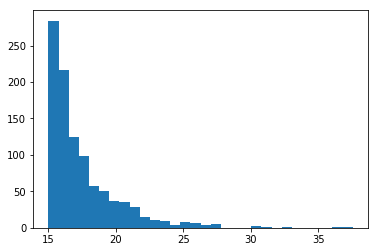

In [79]:
sample = draw_pareto(1000, alpha = 7, xm = XM)
plot_histogram(data = sample, num_bins = 30)

Next, we calcualte the sample maximum likelihood. As can be seen, the value is close to the real value of 7:

In [80]:
one_point_likelihood = get_one_point_likelihood(x = 5.5, xm = XM)
sample_likelihood  = get_sample_likelihood(sample, xm = XM)
print(get_maximum_likelihood_alpha(sample, initial = 6, xm = XM))


Optimization terminated successfully.
         Current function value: 1892.521151
         Iterations: 15
         Function evaluations: 30
[7.07687988]


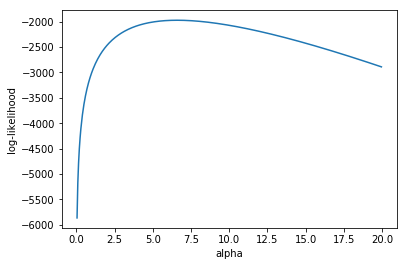

In [31]:
plot_sample_likelihood_by_alpha(sample, xm = XM)

As can be seen, the function is maximized around alpha = 7.

In [35]:
calc_confidence_interval(xm=XM, alpha = 7, n = 1000)

Optimization terminated successfully.
         Current function value: 1899.346006
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.483799
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1888.777829
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.694271
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.006312
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2001.969960
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1851.361279
         Iterations: 13
         Function evaluations: 26
Optimization 

((6.946731828573203, 7.1379791089268), (6.913482090225073, 7.1712288472749295))

The 0.95 and 0.99 confidence values are both centered around 7.

Optimization terminated successfully.
         Current function value: 1906.242330
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.658800
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.721604
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.220730
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1883.115159
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.099812
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.118235
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1897.871643
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.457111
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.722886
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.507054
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1982.671362
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1917.726750
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.813390
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1903.345965
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.841205
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.664685
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1963.675789
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1904.939797
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.104775
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.059326
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1957.935820
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1919.347592
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.104691
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.934252
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.093303
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.309737
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.575605
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1905.256150
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.879223
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.854721
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.392432
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.897547
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.253300
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.166975
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1936.221747
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.646286
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.264148
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.837421
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.206905
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.557633
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.614494
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1900.757777
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1828.404799
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1888.220769
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.287452
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.668401
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1970.449234
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1896.319623
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1916.678126
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.098176
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1965.693261
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1924.432522
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.858022
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.129289
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.125453
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1858.469012
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1827.300330
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1918.258027
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.246567
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.367215
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.623610
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1839.894322
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1937.862765
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.328810
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.453938
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.294773
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.442397
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.020299
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.020930
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1855.163919
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.324564
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.311378
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1850.895870
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.605036
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.615122
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.488339
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1958.020628
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1961.355501
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.193207
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.787062
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.744521
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.748966
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1942.965045
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1915.539344
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.169558
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.931859
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.831122
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.236902
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1818.251957
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1824.011876
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1957.311130
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1927.708319
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.462242
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1850.922592
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.060843
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.117217
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.737804
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1900.999926
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.996427
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.303808
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.392366
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.345359
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.278972
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.282136
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1881.032401
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.153750
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.777419
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.930638
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1973.806354
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1982.311206
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1861.679459
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1895.648840
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.018902
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.924829
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.613406
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.390259
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.953958
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.170687
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1891.496858
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.046647
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.235338
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.676965
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.314170
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.321117
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.588618
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1974.935307
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1883.021242
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.755143
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.171391
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.641633
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.940476
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.077262
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1911.088107
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.496050
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.362404
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.621993
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.959636
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.516438
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.290191
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1866.812395
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.177495
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.736450
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.115952
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.515998
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.601858
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.414702
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1935.074294
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.658301
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1905.024730
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.221833
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.685829
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.601288
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.730544
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1907.270084
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.790820
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1960.796152
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1862.424570
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.284060
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.359577
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1892.120736
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1918.806984
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.220022
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.247487
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.285992
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.080048
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.288382
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1819.674151
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1907.693053
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.429614
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1937.000097
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.393559
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.631671
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.894150
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.486435
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1883.193495
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.712504
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.768187
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.479840
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.034077
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1944.345996
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1896.317974
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1859.871459
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1988.343290
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1884.622948
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.896589
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.468600
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.565970
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.777286
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1895.612267
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.021140
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1871.797841
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.415224
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.847189
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1942.496204
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1947.982008
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1942.357581
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1875.228815
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.243959
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.096077
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.948942
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1971.760001
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1941.463369
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1899.535622
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.960309
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1922.467493
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.526532
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1888.928135
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1978.079636
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1957.378668
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1904.747071
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.515365
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.850720
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.881271
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1841.447125
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1835.238936
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.435139
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1942.058948
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1895.792126
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.164542
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.093261
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.824413
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.217499
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.851649
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1883.528598
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1837.560614
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.606982
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.139815
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.534657
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.565996
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.461370
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1931.592026
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.271773
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.527768
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.232608
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.756928
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.967141
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.228748
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1923.941370
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.737000
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.496490
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.515357
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.665504
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.110028
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.211466
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1895.488136
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.829013
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1959.134170
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1912.130315
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1962.174408
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1905.288370
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1853.901145
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1905.956873
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.780998
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.887190
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1960.946997
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1910.886021
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.947325
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.183325
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1943.026559
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1848.054801
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.615815
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.627592
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.811261
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.414085
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.907877
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1917.870149
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.177539
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.549603
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.860439
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.793271
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.420117
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1976.094949
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1966.714815
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1906.410527
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.314870
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.524930
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.144964
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1803.437182
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1989.715365
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1843.286672
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.371148
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.055421
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1832.080132
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.448952
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.237103
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1846.872838
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1930.366441
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.522154
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.492210
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.486018
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.874391
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1874.142381
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.762340
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1947.198692
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.904685
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.720665
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.281392
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1855.085948
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.160825
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1917.403729
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1937.663604
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.131083
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.645694
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.217815
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1801.467186
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1928.199611
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.594333
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1879.544742
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.908265
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.708537
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1999.706599
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1901.971519
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.411859
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.820155
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1967.210720
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1916.364325
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.110277
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1866.782430
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.061096
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.285170
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.955369
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1930.624893
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.299020
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.674939
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.342278
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.468485
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.344640
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1814.302618
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1921.280630
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.271642
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.262460
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1961.810594
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1898.856555
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1990.820529
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1835.794440
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1915.112874
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.200786
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.016168
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1834.378828
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.221541
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.346442
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.195708
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1882.926524
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.344937
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.371777
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.656616
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1908.751236
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.146383
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.889933
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1881.912576
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.382491
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1904.136898
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.083877
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.091074
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.073022
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1823.706027
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1911.391549
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.438255
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.249752
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.039707
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.101417
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.313026
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.164629
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1919.624541
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.653382
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.664788
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.632477
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.066192
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.566280
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.662795
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1984.829222
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1836.011348
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1828.951328
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1789.888501
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1911.598176
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.912134
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.499808
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1904.484791
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.899449
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.764197
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.229731
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.729850
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.180560
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.695650
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1979.688390
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1922.632775
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.964091
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1981.395883
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1849.587861
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.211987
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1897.941281
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1893.786356
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.828079
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.302094
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.860411
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1822.958603
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1939.608164
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.063466
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1936.257415
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.739561
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.138534
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.231985
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.399590
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.775491
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.930795
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1960.929645
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1909.730909
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.581242
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.916452
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.199420
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.858453
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.736822
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1921.500056
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.982138
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.309480
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1969.670688
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1963.486400
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1915.278506
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1960.815797
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1944.933419
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1920.577873
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.969607
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.810992
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.506708
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.664619
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.722465
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1942.379485
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1919.332019
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.046131
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.025698
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1833.329972
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.653129
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.793862
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1894.260693
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.741647
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.177516
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.531941
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.575235
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.820242
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1824.434438
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1912.914134
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.005767
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.234767
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1976.905469
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1923.131884
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.745062
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.119929
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1887.910892
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.904722
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1970.227040
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1880.605840
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1846.751750
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1990.166680
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1915.080117
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1941.816218
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1922.557327
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.980229
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.005961
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.755765
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.311288
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.253916
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1907.863494
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.443012
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.013846
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.378307
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.531380
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.467834
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.506058
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1953.894900
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1909.658549
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.319552
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1926.179578
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.996287
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.821317
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.921942
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1921.770508
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.809778
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1916.482304
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.615646
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.908342
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.920327
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.224521
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1856.827311
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.703054
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.817623
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.987918
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.271333
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.905599
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.142350
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1821.206423
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1931.197642
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.086674
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.652655
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.346476
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.825642
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.874511
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1894.221899
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.877858
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.179242
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.852993
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.927612
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.627095
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.828119
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1841.577749
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.086594
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1827.055262
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1887.428970
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.095852
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.812570
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.684423
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1959.543323
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1891.996167
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.139078
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1963.533081
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1905.999307
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.735780
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1882.954454
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1822.143441
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1855.192129
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.581566
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.344171
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.525146
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.182608
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1845.900940
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1893.580001
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.903886
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.582970
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.010323
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1833.400619
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.528980
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.439486
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1896.548055
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.208135
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.546784
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.363503
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.946175
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1999.766727
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1889.363164
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1852.695901
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.265558
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.838513
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.572106
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.705710
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1964.760327
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1914.225627
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1870.867894
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.051424
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.206344
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.205493
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.449775
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.015616
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.589807
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1937.575636
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.833109
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.243995
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.248013
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.704563
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.555061
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1964.879270
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1884.016394
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.984426
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.227634
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.080391
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.215299
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.392349
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.518475
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1955.575256
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1889.310795
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1850.075394
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.218103
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.960094
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.747282
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.647183
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1866.774834
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1960.038102
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1937.019633
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.320366
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.516431
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.868580
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.969140
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1873.457054
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.340833
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.593806
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.137837
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.580906
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.278714
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.967090
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1942.116833
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1937.040807
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1960.364321
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1937.524287
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.901880
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.912919
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.809353
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1922.955091
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.078712
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1902.739840
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.616186
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.760335
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1975.328166
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1934.872688
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1952.666130
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1899.352223
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.789787
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.131665
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.117789
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.852796
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.413269
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1932.711740
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.677307
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1973.493345
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1944.798119
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1975.973128
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1929.670093
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.942827
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1856.705388
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.122885
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1858.522029
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1834.933743
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.908148
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.436536
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.155570
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1857.839711
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1960.490858
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1924.539969
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.769652
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.809278
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.790806
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.592654
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1914.532734
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.235061
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.660272
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.557540
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1965.380015
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1872.197634
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.214433
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1846.845817
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.945485
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1959.129600
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1890.770642
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.250378
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.592918
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.675900
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1902.626580
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.286046
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.847292
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1843.225588
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.501450
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.153385
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.968031
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1902.895924
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.994406
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.754324
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.094059
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.816352
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.980293
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.928717
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1984.195094
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1932.244528
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.339743
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.936460
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.747076
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1953.394632
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1940.755129
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1932.302139
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1840.661259
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.131570
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1959.592384
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1876.387471
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.524887
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.714559
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1943.045544
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1837.384674
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.436573
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1796.031320
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1915.033819
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.924933
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.480693
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1902.265430
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.981360
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.703879
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.032543
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.297517
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.968322
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.244403
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1886.620062
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.543617
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.299967
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1966.718217
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1963.454508
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1896.194611
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.256034
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1871.690141
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.023717
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.169927
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1967.955079
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1942.496086
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1900.296239
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.765805
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1945.758697
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1906.159856
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.412014
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.695335
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.464587
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.111901
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1977.039407
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1902.592861
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.906162
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.213016
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.917133
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.262743
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.260573
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1964.705765
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1915.247358
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.866517
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1968.737232
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1907.730244
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.453754
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.179796
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.305912
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1916.124670
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.068136
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.634225
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.996201
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.670080
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1998.764299
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1864.265425
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1881.374091
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.577881
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.512776
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.699378
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.048335
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.880352
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.720132
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1900.301986
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.919715
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.397172
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.212106
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.257318
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.205213
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.350116
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1872.546489
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.909348
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.140595
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.956304
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.649662
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1973.494762
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1935.188498
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1904.148370
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.897133
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.784624
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.316957
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1839.177699
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.574378
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1846.357645
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1907.922504
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.530620
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.449765
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.964551
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1880.672665
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.201564
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.542194
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1941.757265
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1948.103818
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1901.388346
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.491298
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1836.409734
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.443522
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.601217
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1878.715856
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.539706
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1968.252698
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1915.112402
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.238795
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1868.565332
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.014958
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1890.503208
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.450774
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.938590
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.834270
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.684279
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.601116
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.408918
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1846.747385
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.745598
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.082932
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1898.772003
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1852.347240
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.159127
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.629392
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1939.807340
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1973.987974
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1866.102667
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.980512
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.784810
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.531939
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.727465
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1909.279785
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.342469
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1902.565430
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.894831
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.207177
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.903547
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.190764
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1898.395894
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.112135
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.590319
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1920.705864
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.605719
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.070733
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.451394
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1851.172607
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1971.488384
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1973.562595
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1930.122532
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.017923
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.932543
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.368705
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1958.850070
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1924.899617
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.324977
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.655548
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.568631
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.288895
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.479136
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1892.359503
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.601853
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.421095
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.528385
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.912897
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.453630
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1834.437494
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1905.975559
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.952527
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.411075
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.392310
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2008.569855
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1835.254862
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.502504
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1932.937181
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.563620
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.422582
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.346838
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.421367
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.136728
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.252606
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1900.136552
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1961.144458
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1915.780329
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.232999
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1894.753231
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1985.740485
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1943.484279
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1894.465946
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1975.720001
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1867.378294
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.924388
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.311001
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.685352
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.884702
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1913.661295
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.179343
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.002555
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.451987
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1901.701959
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.115897
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.622452
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1867.063733
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.180680
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.340059
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.291514
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.788909
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.522936
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.999499
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1880.776560
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.552534
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.542657
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1821.081544
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1887.345269
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.631899
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.603055
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1928.388469
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.729627
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.810469
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.975629
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.821811
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1995.094019
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1973.699507
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1883.581343
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.288649
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.880384
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.834863
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.562125
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1897.553959
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.429056
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1949.415917
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.282003
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.513428
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.314505
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.301771
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.754944
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.977138
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1894.126616
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.058478
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2024.142085
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1828.530924
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1935.763500
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.385987
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.221705
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1910.910961
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1981.000833
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1895.876100
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.055661
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1961.325450
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1930.030339
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.557103
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1897.356915
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1819.087878
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1896.025040
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2004.844837
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1942.365457
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1833.357513
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.607925
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1921.195231
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1973.874301
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1858.543755
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.831981
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.375453
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.086332
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1819.743927
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1888.298158
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.801703
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.915795
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.021017
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.217640
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1967.005777
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1911.350554
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1907.804118
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.941986
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.257340
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1959.351717
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1990.096356
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1855.929555
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.345400
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1961.146627
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1935.494591
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.408671
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.005644
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1944.683271
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1931.202350
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.080218
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1879.422356
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.730202
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.919027
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.921044
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1843.218726
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1828.343155
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1869.161812
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1908.999954
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.237629
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1915.750877
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.472306
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.102221
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1910.385125
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.021313
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1876.750387
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1965.953194
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1856.973704
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.592992
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.203305
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.509902
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.818658
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1948.475371
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1841.064377
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.875322
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.019600
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.455063
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1885.600724
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.880769
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1841.887489
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.147644
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.799834
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.699747
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.108704
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.229112
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.673721
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1914.215143
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.162580
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.135106
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1986.101506
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1878.400020
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.604964
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1829.386949
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1936.072034
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.685824
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.047633
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.988799
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.339299
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.491835
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.378015
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1876.410599
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.513004
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1948.042576
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1935.976686
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.041526
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.900598
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.738414
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1963.278133
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1987.168118
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1928.312539
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.209383
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1832.702256
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.643340
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.750593
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1850.062872
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.842611
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.086470
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.704375
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.762771
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1843.472692
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.286121
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1932.998128
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.634719
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.779611
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.735733
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.445750
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.543816
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1829.547226
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1912.491830
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.954524
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.850531
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.577946
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1874.512955
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.031873
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.360132
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1904.851356
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.926144
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.112207
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.170995
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.902643
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.375085
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.791287
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1920.822615
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.900146
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1837.573369
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.872189
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.210323
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1885.666522
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.958377
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1968.906444
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1914.669570
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.521475
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.246823
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.856018
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.943677
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.238435
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1974.276198
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1880.285868
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.628602
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1882.174400
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.983470
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.662770
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.538060
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1906.635512
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.920248
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1924.476639
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.185342
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.296293
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.992602
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1953.219266
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1931.223075
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.383684
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.560742
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1815.679325
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1922.728333
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.326922
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.265206
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1908.457915
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.451899
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.234759
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1960.205646
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1858.623144
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.658281
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.328159
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1892.884052
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1797.873230
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1870.126298
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.985031
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1847.928908
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.922182
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.783935
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1920.268326
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.342350
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.291146
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.892633
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.305611
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.104243
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.236206
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1885.361986
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1839.014547
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.124257
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.843855
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1928.490409
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.065685
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.750106
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1931.916575
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.511400
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.496936
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.100078
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1812.319282
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1918.878171
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1970.082131
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1896.203543
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.213547
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.489185
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.454901
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.082731
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1967.983435
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1843.409844
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1872.517241
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.559507
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.815385
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.609186
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1838.006700
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.645115
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.895076
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1931.552948
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.507556
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1961.331642
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1859.612029
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.383015
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.062161
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.995379
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1900.677304
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1973.348654
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1927.342077
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.846598
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.909335
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.425742
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1972.852580
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1931.508421
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.485551
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.642358
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.802625
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.547885
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.609839
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.374015
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1936.576220
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.477475
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.485262
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2008.476885
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1884.719864
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.668690
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.013295
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1919.454989
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.501141
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.174141
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.959411
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.662822
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.221317
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.522199
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1896.548704
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1953.449182
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1899.518602
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.363721
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.273885
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.136513
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1964.574966
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1914.933171
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.303964
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.059540
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1939.035650
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1853.771357
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1967.200573
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1875.804515
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1880.149899
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.934498
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.873739
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1915.000584
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.531457
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1971.023867
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1908.614273
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1874.402630
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.605924
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.391686
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.734852
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1988.309712
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1949.495931
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1888.062799
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1924.375834
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.062794
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.519294
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1934.546966
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.334474
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.771295
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.445613
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1899.175015
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.714829
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.106623
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.605637
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.745427
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.687278
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.557038
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1946.080384
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1906.019582
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.671718
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.500334
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.324433
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.971864
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.088067
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1939.324695
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.519793
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.593664
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.098338
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.155160
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.864328
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.180315
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1920.768451
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.680007
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.640728
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.780173
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.977489
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.075553
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.515303
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1883.657260
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.494515
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.963104
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.698976
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.099035
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.998124
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1914.289705
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1905.626518
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.751839
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.403187
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.023944
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.784934
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.403113
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.475450
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1905.789892
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.521522
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.755413
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.644057
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.888255
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.735439
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.044837
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1956.430867
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1960.179787
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1914.373727
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.458061
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.462592
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.918648
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1945.288571
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1925.071084
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.965189
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.154685
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.165751
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.575801
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.556942
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.772208
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1891.091324
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.410478
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1942.506529
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1952.461205
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1964.625381
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1912.991654
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.024883
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1888.652140
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.342745
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.954427
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.846828
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.043981
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1962.131616
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1883.296470
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1885.770525
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1985.949313
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1916.402190
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1964.843956
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1879.779512
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.853092
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.908260
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1878.387588
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.968797
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.984469
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1974.194488
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1912.386403
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.275261
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.230285
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1879.451743
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.633923
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.510190
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.296265
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1854.378105
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1831.261485
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.020414
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1890.721094
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.259151
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1854.828254
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.447546
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1872.341375
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.946829
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.436869
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1886.139087
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.055423
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.315155
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1986.446657
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1860.314036
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.115445
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.537936
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1932.980603
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1975.264563
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1905.183754
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.698728
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.199039
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.841337
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.765921
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1889.998215
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.762270
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.942144
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.700205
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1971.985089
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1864.804481
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.781577
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1932.551111
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.485524
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.286128
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1905.167214
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.787178
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1910.699630
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.614351
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1902.802578
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.083334
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.071129
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.591420
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.464474
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.152476
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.051380
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1912.682220
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.372143
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1992.863113
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1944.330546
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1870.521618
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.373253
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.139888
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1915.519609
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.913899
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1969.179014
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1854.687777
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.146755
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1875.549631
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1997.248382
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1930.524649
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.545560
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.237993
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.689005
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.016615
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.981181
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.610027
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1940.832455
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1901.771633
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.548905
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.198763
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.006260
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1943.439730
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1904.654232
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1835.536212
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.889444
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.779325
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.939843
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.896896
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.442837
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.852562
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1956.249119
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1896.380659
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.629782
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.867727
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.259201
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.156275
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1912.043215
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1926.983211
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.111039
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1947.569975
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1879.767247
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.578454
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.585295
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1865.539123
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1861.430798
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1967.389380
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1924.838447
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1836.387430
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.016770
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1947.049834
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1895.710082
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1844.912341
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.891815
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1852.295343
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.007346
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.308272
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.130918
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.686044
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1940.328398
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.901028
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.900283
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.439338
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.087194
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.002367
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.394193
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1887.671747
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1973.602989
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1933.777163
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.106269
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.681775
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.342651
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.125283
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1835.680794
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.095381
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.719210
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.791629
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.165652
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.709739
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.883228
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1873.109542
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.373891
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.822930
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.084160
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.544805
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.843433
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.896757
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1862.906214
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.733741
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.167430
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.573469
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.994610
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.177187
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.304002
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1933.284994
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.824298
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1904.133029
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.491518
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1853.487699
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.112130
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.865466
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1890.562868
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.587030
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.304500
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.303371
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.829815
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.113758
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.042201
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1817.257684
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1889.816589
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.586045
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1961.232057
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1914.727736
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.224330
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1854.824671
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1927.157739
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1854.961100
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.983693
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1963.477156
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1866.425283
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.566292
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.173125
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1874.691822
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.921110
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.761433
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.338271
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.436707
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.693237
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.823514
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1918.688727
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.927126
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.261720
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.242589
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1847.737697
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.813382
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.729305
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1902.320090
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.622282
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.701314
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.336652
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1899.627984
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.191829
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1976.415562
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1938.104966
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.861563
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.889553
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.050548
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.999739
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.643635
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.253365
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1848.576540
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.657721
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.479853
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.796063
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.569606
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.262144
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.138559
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1912.153941
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.498613
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.984097
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.792294
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.522854
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.048554
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.974464
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1913.300739
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.424626
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.085234
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1965.708572
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1846.484637
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.869821
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.009573
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1887.466361
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.421243
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.513111
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1963.193223
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1899.762706
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.907177
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.126300
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1871.784531
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.624450
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1897.532848
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.461783
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.768887
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.994622
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.486275
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1915.663989
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.231973
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.618479
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 2003.031994
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1908.833627
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.555288
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1966.207336
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1944.236097
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1836.828704
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.541878
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.176274
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1884.083302
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.548106
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1975.407458
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1829.929684
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1965.002514
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1892.847564
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.194940
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.835991
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.686309
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1927.494504
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1874.708066
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.661195
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.128671
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.690177
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.976650
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.041119
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1885.674240
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1862.020146
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.757991
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.047965
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1914.196063
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.022291
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.477577
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.861623
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1899.342918
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.733293
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.875396
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1907.533729
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.443212
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.633468
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2014.130195
         Iterations: 15
         Function evaluations: 30
Optimization 

Optimization terminated successfully.
         Current function value: 1867.241512
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.377183
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.316872
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.059893
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.192850
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.898818
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.125088
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1890.618142
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.044163
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.540818
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.798483
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.841758
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.179744
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.027544
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1931.260410
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.451946
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.186856
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.585751
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1844.074387
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.011463
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.403446
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1922.534811
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.911825
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.389395
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.358675
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.652929
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.062406
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.316828
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1902.094875
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.320613
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.471378
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.477626
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.754126
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.003496
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.800025
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1910.311806
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.862243
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.695855
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.537812
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.388224
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.221127
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1868.336088
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1970.372108
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1857.754345
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.142513
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.167850
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.463043
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.512889
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.076703
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1827.855110
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1946.829400
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1954.739928
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1958.216941
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1881.130724
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.899470
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1966.057556
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1884.587319
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1969.209654
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1890.404622
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1966.891960
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1928.995148
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.432434
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.539222
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1913.869870
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.373131
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.311256
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.633525
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.316105
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.104255
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.314658
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1891.335620
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1825.722294
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1881.445650
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.923208
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.346416
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.637927
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.274543
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1881.470384
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.045746
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.875988
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.396139
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.626885
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.452934
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.724717
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1861.968657
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.738773
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.895240
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.089402
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.655578
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.461607
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.318171
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1898.667226
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.022556
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.683432
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.467122
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.232095
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.757823
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.265495
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1968.688255
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1901.514286
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.362264
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.812841
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.080035
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.628230
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.378832
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1909.929996
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.716749
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1960.021648
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1920.598662
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.372230
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.724227
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.991882
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1883.146634
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.863985
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1897.009805
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.457344
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.357276
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.342623
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.788691
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1921.180043
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.441157
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1915.791499
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.088630
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.943282
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.347032
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1988.669992
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1864.992720
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.633539
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.062164
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.188221
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1773.771558
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1905.616263
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.738552
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1874.820982
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.438364
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.961496
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.492627
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.279308
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.740219
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.817726
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1830.522403
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.518544
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1900.485868
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.466164
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.118751
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.256583
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.509226
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1895.350520
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.099419
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.016312
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.311067
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.092924
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.613511
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.204778
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1896.398299
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.411055
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1985.090568
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1863.535493
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.734947
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.111678
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.563144
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1926.861769
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.204989
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1879.507381
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.560290
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1852.631736
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.566413
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.826318
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1966.387723
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1859.878953
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.025596
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.522384
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.763849
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.638447
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.948337
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1840.369164
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.190713
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1962.372864
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1931.026834
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.133316
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.796741
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1963.310121
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1838.171819
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1843.719221
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.028944
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.413771
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.944216
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.045019
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.055522
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1960.582205
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1948.157795
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1892.907677
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.254483
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.884661
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.828721
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1923.533717
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1879.519012
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1843.534125
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.860614
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.406311
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.269130
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1984.108699
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1922.460532
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1890.982806
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.220887
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1912.251627
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1978.367417
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1877.371949
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.543438
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.955216
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1891.385096
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.079757
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.904319
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.221008
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.268054
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.032065
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.234395
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1921.249812
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.760183
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1836.884220
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2002.259157
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1916.879891
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.784283
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.769728
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1918.933498
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.556219
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.748845
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.645629
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.732728
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.316845
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.359697
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1899.589372
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1997.409611
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1902.055510
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.658807
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.289846
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.990274
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1936.935090
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1929.607303
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1847.962780
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.861780
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.196865
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.722296
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1864.361197
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1840.926832
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1914.505816
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.632171
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.733072
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1845.466139
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1832.547860
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.502255
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.311604
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1906.203060
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.687847
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.765661
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.418418
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.866427
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.286379
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.404590
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1957.472452
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1872.396067
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.744237
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1837.983289
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.822253
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1843.695865
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.685703
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1921.068787
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1960.717988
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1947.874684
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1907.768240
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.342746
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.431543
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.132282
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1842.486886
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.855742
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.345608
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.788863
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.010473
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.325787
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.141559
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1941.134798
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1896.798628
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1834.227331
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.541600
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.166896
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1822.103736
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1927.107436
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1903.806900
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1968.977308
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1867.844336
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.937674
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.848405
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.460943
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.329796
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1954.025341
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1852.193539
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1853.188476
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.955519
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.143680
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1915.789910
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.479987
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 2002.027003
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1914.023063
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.664109
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1838.478367
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.534082
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1981.680514
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1882.489960
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1861.837974
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.574866
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.452236
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.990623
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.886241
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.016029
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.543794
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1954.726900
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1915.979530
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.032285
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.542227
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.802833
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1969.134890
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1873.593579
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1907.430191
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1852.774450
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.461251
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1899.364273
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.560609
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.862583
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1907.955146
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1873.198388
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.551165
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.382681
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.301543
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1974.346068
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1898.669317
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.356791
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1908.211006
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.976793
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1838.991177
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.186294
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.819495
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.969943
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.127338
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1963.013573
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1833.827101
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.224952
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.252453
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1818.319958
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1901.029513
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.881511
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1913.550142
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.634378
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.866078
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.718091
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.260445
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.856775
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.464407
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1920.028563
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.903986
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1968.048915
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1879.588272
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.490799
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.163926
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.103708
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1929.995868
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.408743
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.660714
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1972.267617
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1880.592349
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.533700
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1822.904051
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1961.502447
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1950.946602
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1801.725308
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1907.922494
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1979.535526
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1929.587239
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.773661
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1917.579453
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1854.862680
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.537369
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.726586
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.547629
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.405802
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.290270
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1965.381861
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1916.410136
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.409745
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.651146
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.190642
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1960.663303
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1931.872740
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1862.523293
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1841.125517
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.419242
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.009902
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.166190
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.633068
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1918.161862
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1968.703533
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1910.819575
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.702105
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.791651
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.309071
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.419136
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.983925
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1948.206775
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1872.988835
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.542269
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1904.578849
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.151836
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.719529
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.631238
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1981.392563
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.206193
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.014528
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.235529
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.750075
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.337618
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.293988
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1896.083016
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.884120
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1898.695173
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.067185
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.247579
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.110491
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.691216
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1880.838082
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.283610
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.252342
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.559677
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.077780
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.000485
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.539243
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1885.673492
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.059526
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.128264
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.355424
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.219364
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.986720
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1837.683153
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1864.037611
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.034668
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.946922
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.777895
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1969.510995
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1910.032494
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.939658
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1928.720954
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.074966
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1814.692802
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1871.647644
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.716151
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.626895
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.105552
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1974.289750
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1886.178684
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.460473
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.467304
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1959.162560
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1902.809088
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.107796
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1880.191431
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.694320
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.782547
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.678608
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.194558
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.723911
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.562221
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1884.611843
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1854.338192
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.436226
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.450806
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.990730
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1850.749247
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.510555
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1925.116405
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.995965
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.097327
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1939.834564
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.222055
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.714992
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.580291
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1877.479054
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.151271
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1954.123894
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1859.361832
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.167544
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.246565
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1839.625876
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1902.398740
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.500724
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.642953
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.154200
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.422138
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.073694
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.564437
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1931.526940
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.939088
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.336583
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.014941
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1869.650492
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.428170
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.978663
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1885.149715
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.592685
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1888.060603
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.017488
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.355641
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.456087
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.841039
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1889.024174
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1972.864959
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1917.160605
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.414490
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.940661
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.593999
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.755615
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1905.424778
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.722231
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.249211
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.397308
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.578488
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1930.224408
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.550230
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1912.901995
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.567120
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.868165
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.512549
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.293124
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1971.706266
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1926.055767
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1830.969224
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.557068
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.314334
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.079924
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.294220
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1968.134205
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1930.453778
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1910.847196
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1964.061190
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1886.889732
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.778087
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.154732
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.883732
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.931035
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1901.219614
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.328989
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.797834
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1973.694020
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1887.062008
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1975.241911
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1976.317946
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1863.463828
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.145378
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1979.063874
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1892.921992
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.560211
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.445860
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.368771
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1916.656213
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.543382
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1996.782195
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1884.032638
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.252115
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.153541
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1899.710356
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1840.410875
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.417815
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.703029
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.415276
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.456398
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.140079
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.533018
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1897.338170
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.356869
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.422899
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.359286
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.081956
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1896.055390
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.511128
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1938.038311
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.501330
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.083454
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.812544
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.955979
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.376600
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.776001
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1888.285093
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1970.897291
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1965.634109
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1929.225134
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.989912
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.046742
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.559299
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1876.439077
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.599187
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.149274
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.324571
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.907590
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.974886
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.161843
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1928.223249
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2009.253054
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1970.978744
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1910.399021
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.801688
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.238465
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.295619
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1969.185664
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1964.410064
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1913.370367
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.899292
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.306189
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.080610
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.540913
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1966.739512
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1903.380696
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.133203
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.842331
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.384276
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1982.935180
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1937.024199
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1836.600775
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.927688
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.107802
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.132568
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1846.806652
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1975.306047
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1907.359209
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1908.953615
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.717926
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.010702
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.930870
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.325137
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1843.240861
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.557553
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1941.875642
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1915.417057
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.870096
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1924.321131
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1852.132038
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.510543
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.659792
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1879.005414
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.964303
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.708641
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.970093
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.597645
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.534930
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.231376
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1883.638827
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.104016
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.352559
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1991.075336
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1880.083208
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1841.849264
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.991477
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1822.922515
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1855.056509
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.303220
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.271280
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.507453
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.757270
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.740284
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1956.926280
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1815.351118
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1873.517396
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.887474
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.926155
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.847446
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.269954
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1904.886875
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.062190
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.134562
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.996693
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1959.607295
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1864.476420
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.882258
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1939.606191
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.841558
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1978.211533
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1849.052478
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.590499
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1837.409936
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.409606
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1939.291878
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.702438
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.265027
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.848901
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.719590
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1854.338720
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1996.464505
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1926.573182
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.078427
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.961869
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.970363
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.472311
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1906.623551
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.608873
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1895.429409
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.867496
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.969251
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1961.682253
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1863.157903
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1972.059826
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1889.569744
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1892.717771
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.546260
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1868.284297
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.910319
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.659200
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.290559
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.614540
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1847.337864
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.213265
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1978.875307
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1898.448062
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.226341
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.603070
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.627826
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1906.981207
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1825.104395
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1876.491488
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.493048
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.218371
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.385046
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.964904
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1885.931527
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.012388
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1851.702905
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.824172
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1885.993056
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1786.572772
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1885.060036
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1857.684947
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.681024
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.515409
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.642412
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.596981
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1984.449701
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1841.874576
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1851.035030
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.356955
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.832070
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.548409
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.199878
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1854.257953
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.113763
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1894.157652
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.075413
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.984771
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.935943
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.988890
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.536056
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.201365
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1846.793722
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.019586
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.378123
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1866.273687
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.082321
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1853.380444
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.218476
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1932.195865
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.028696
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1814.495891
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1817.267012
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1845.169309
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.674220
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1967.880712
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1848.699494
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.753002
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1983.471199
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1838.583257
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.109382
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.312258
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.594614
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1917.361338
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.219829
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.668101
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.096029
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.604895
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2021.244846
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1909.536503
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1840.651731
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.132015
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.090061
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.042881
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.269379
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1851.542297
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.434442
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1907.987465
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1841.777426
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.472589
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1961.876228
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1861.054043
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1967.183996
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1891.046011
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1890.248140
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.722225
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.651438
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.601666
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.483347
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.331969
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1986.098076
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1840.730021
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.028337
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1975.150565
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1859.966743
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.104548
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.685761
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.656222
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1879.077343
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.636438
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.008003
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.110118
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 2013.088278
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1849.867195
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.809033
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1976.502132
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1926.594583
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.545378
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.504287
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.642097
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.419857
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.288626
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1894.705272
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.515813
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1953.615305
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1922.838465
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.594970
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.420183
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.359819
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1865.501026
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.259447
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.166081
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.528434
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.211312
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.644699
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.219639
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1907.563074
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.490670
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.472356
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.721273
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.413409
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.358508
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1954.315166
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1885.685603
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.474741
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.389169
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.689962
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.451372
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.154013
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.756575
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1913.790613
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.004365
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.901682
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1953.833980
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1918.641350
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.373924
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1845.685477
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1931.523911
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.271682
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.493362
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.681021
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.324905
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.620743
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.509160
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1945.411554
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1911.362802
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.283695
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.032091
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.604943
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1865.366550
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.181006
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1923.068980
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.160661
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.783020
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.928683
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.695301
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.999370
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.225526
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 2023.834329
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1883.390034
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.420050
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.626144
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.909053
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.550974
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.092164
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1859.081744
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.091038
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.311039
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.418373
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.718043
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.374615
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.184028
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1894.266421
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1840.261204
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.132638
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.548402
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.639365
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.096125
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1959.346440
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1909.800145
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1852.227117
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.713960
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.430708
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.520307
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1973.988544
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.681255
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1891.068015
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.831696
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.743667
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1997.974786
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1948.550258
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1888.579886
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.200142
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1902.892718
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.309465
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.959642
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1908.427815
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.633538
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1815.202829
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1910.352553
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1875.170539
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.186966
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.353831
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.343352
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.792982
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1907.694335
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.248726
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1936.712151
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.314866
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.232086
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.771007
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1892.919068
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.138654
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.980282
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1937.910719
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.173184
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.107322
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1922.594831
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.452454
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1857.146561
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.529046
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1869.666968
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.840336
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1852.744775
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.636342
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.285560
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.735436
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.843147
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1958.882911
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1872.969761
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1818.189579
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1894.940551
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.303262
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1839.290815
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.726449
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1897.996766
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1967.875695
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1908.336933
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.251634
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.098060
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1802.634870
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1875.658941
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1868.291722
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.520997
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.756258
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.684910
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.619705
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1912.927601
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.066711
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1922.745458
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.096787
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.532874
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1860.893633
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.423882
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.981479
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.999109
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1949.213841
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1917.470762
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.436956
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.682941
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.524400
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.712937
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1835.871271
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1904.246663
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1971.010898
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1908.776301
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.230420
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.448986
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.400209
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1969.510376
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1910.997392
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.587275
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.538491
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.311228
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.317019
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1949.603016
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1868.731026
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1928.430607
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.427840
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.769500
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.101305
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.549806
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.932519
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.043161
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1926.961554
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.617615
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.936723
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.525093
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.531403
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.818354
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.395951
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1892.889723
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.166306
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.996387
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.986921
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.413068
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.129392
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.288113
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1968.608074
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1918.059493
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.512952
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.692530
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.320861
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.885509
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.182051
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1900.483357
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.847747
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.867057
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.177808
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.968680
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.796361
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.575254
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1918.761524
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.481090
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.903601
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.327213
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.804052
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1835.814738
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.757652
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1898.005124
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.365896
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.474069
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1888.222956
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.329010
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.101736
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.087708
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1939.115810
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.703126
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.109156
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.934525
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.931607
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.634322
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.495546
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1870.926492
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.181812
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.465017
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.429685
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.518177
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.657281
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.252594
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1927.821801
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.459305
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.489028
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.539762
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1878.631869
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.874447
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1981.609695
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1886.789543
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.837701
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.840088
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.473136
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.015073
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.695316
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1858.367596
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1955.504368
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1912.096065
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.607571
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.256608
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.573230
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1853.068915
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.654293
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1948.555096
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1965.030454
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1870.111445
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.206332
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.386827
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1940.748502
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.588913
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1858.080098
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.278529
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.349016
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1964.779533
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1852.999985
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.315535
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.290320
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1918.548145
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.225429
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.543973
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.335351
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.420960
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.025505
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1986.179589
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1846.079257
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1931.570365
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.942421
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1964.178095
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1866.507080
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.808750
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.507053
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1925.838229
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.162919
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.975683
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1869.431339
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.178534
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.911738
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1964.400902
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1950.785318
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1892.564955
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1958.780419
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1908.212646
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.910966
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1875.131186
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.179593
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1961.004036
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1850.798626
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.460232
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.649307
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.687134
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1842.237041
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1853.403208
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1868.676064
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1945.607090
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1961.643818
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1907.294644
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.438607
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.981662
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.080611
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1907.012573
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1830.013667
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.122712
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.007939
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1980.115258
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1891.767473
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.734849
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1855.188945
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.179591
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.706067
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.275234
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.955707
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.534063
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1885.187118
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1930.560279
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.719153
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.247904
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.339844
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.106643
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.456848
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.719056
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1886.695952
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1834.355414
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.063204
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.275935
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.635670
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.000058
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1944.385639
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1885.607972
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.042062
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.865772
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.019285
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.438555
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.342876
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.586447
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1899.552043
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.166807
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1850.306593
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.799055
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.044394
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1928.788516
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.882077
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1919.922471
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.276776
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.021185
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1843.398899
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.823929
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.730466
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.036431
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1949.937968
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1844.518405
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.431175
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1852.071939
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1960.632633
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1985.326616
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1938.653200
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1854.532770
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.292973
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.352518
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.864990
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.160701
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1971.790928
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1848.503785
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1903.744538
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.894881
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.277504
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.991948
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.745905
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.414068
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.603732
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1906.437729
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.543780
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1969.539229
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1862.044099
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.161157
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.051691
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.928523
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1934.937667
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.990918
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.430272
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.721233
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.906690
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1961.627234
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1914.689813
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1855.755612
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.386801
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.511948
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.643520
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.646453
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.683082
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1960.910143
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1854.551202
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.974567
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.781810
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1953.065055
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1869.350022
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.338871
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1909.861708
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1928.343089
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1972.578511
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1901.911987
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.618423
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.645800
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.725655
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.845986
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1876.847186
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.817935
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1968.094498
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1901.089753
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2015.506496
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1867.910225
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.724088
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1864.536501
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.370364
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.226353
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.335186
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.770784
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.529485
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1862.305248
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1852.072588
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.381928
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.811258
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.826231
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1892.543822
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.040139
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1860.982132
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1890.869818
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.086207
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.287858
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.257925
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.634745
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.058902
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.002977
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1981.118128
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1856.872082
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.789375
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1834.065453
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.842132
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.537723
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.907031
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1950.636842
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1905.123595
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.567428
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1862.245534
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.977261
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.927046
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.112380
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1914.513994
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.076189
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1964.719340
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1937.685606
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.511461
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.132491
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.761165
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1923.435724
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.448506
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.787399
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.465472
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1971.430501
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1909.982645
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.051021
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1990.830546
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1895.395006
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.391909
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1963.513990
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1843.954444
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.860927
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.181320
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1910.500103
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.798726
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.928109
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.990636
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.906123
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1821.042691
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1893.228200
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1945.297172
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1889.103092
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.985951
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.796776
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.626997
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.999229
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.021275
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1908.555431
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.615071
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1980.000266
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1862.992910
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.938424
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.198554
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1826.646390
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1866.767189
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.199984
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.310399
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.356004
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1826.598407
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1945.932760
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1929.957141
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1885.246223
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1838.529986
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.469704
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1814.186549
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1879.400679
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1978.976008
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1929.491684
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1931.759241
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.468485
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.673780
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.233902
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.347752
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.101451
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.424219
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1854.439738
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.809975
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.082154
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.552022
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.903053
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.476767
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.398564
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1891.517938
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.242535
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.331362
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1860.000080
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.985759
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1834.273251
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.910988
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1873.602649
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.964129
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.882460
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.224359
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.193475
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.229471
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.298135
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1946.064885
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1865.383101
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.386001
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.268649
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.537555
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.902370
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.925764
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1896.280697
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.685097
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.368930
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.745470
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.804475
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.670395
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.605409
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1930.169930
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.846976
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.567041
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.070323
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1934.012318
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1854.756194
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.642945
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1911.254780
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.071211
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.739091
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.431202
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1862.414357
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.091242
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.991148
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1928.157547
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.244769
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.404509
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1965.661442
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1889.724094
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.415330
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1970.836750
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1888.360608
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1825.675302
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1921.064939
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.364285
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.900379
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.096103
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.741628
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1925.963042
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.386181
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.543001
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.268021
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1966.974927
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1929.063639
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.322846
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1950.481890
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1878.157641
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.003649
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.831694
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.204166
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.487111
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.073260
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1918.113879
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.010311
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.858833
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.778766
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.248401
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.148015
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.699676
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1917.507857
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.046810
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.950061
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.168956
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.148232
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1968.245111
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1970.521587
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1954.184443
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1921.681225
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.225568
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.013605
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1873.918204
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.567314
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1846.374198
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1918.692117
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1825.787505
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1969.083353
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1916.363634
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1974.798859
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1880.118472
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.950630
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1931.062198
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.044938
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.206230
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1932.770695
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.421256
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.114025
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1850.462284
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1942.908895
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1973.267788
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1908.351964
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.222592
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.632866
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.744067
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1863.835875
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1909.589504
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.151107
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.143556
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.338507
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.315221
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.264628
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.022882
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1886.596165
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.692535
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1834.751220
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.233326
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.173520
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.102990
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.874331
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1911.265845
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.758134
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.971040
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.077959
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.937369
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.716425
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1959.241873
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1789.203303
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1899.362704
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.665972
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.311159
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.234925
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.790251
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.648960
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1843.210663
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.953502
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1959.076446
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1883.673014
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.283854
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1981.026566
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1898.957940
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1859.311767
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1953.384842
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1940.249821
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.564146
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1946.351659
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1897.818647
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.488801
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1924.925580
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.277934
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.172995
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1877.150134
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1963.721843
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1922.907944
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.013258
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1911.576368
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.073127
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1820.150278
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.873941
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.521866
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.972743
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.578372
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1928.448135
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.744825
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.796647
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.731003
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1953.757128
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1950.411830
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1858.612278
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 2001.992149
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1903.587157
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1806.259253
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1857.030142
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.887968
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.133485
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.229470
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1949.813831
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1945.180720
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1952.214126
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1939.106636
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1864.323553
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.460364
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.355458
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1858.654072
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1937.729011
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1871.627337
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.443580
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.854259
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.760745
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1947.371828
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1902.511640
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.499848
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.656774
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1935.590222
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.115871
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.704062
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.143598
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1951.174447
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1892.249453
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.978643
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.205672
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.584774
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.532775
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.539869
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1867.292124
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.656118
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1896.200601
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1853.121220
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1970.263109
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1943.097726
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1910.249297
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1962.345192
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1910.350284
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.864629
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1906.733672
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.763685
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1873.658375
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.641869
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1882.515374
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.922267
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.339620
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1978.563942
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1891.690058
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.889435
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1981.979687
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1938.196444
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1907.335941
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.867080
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1990.431856
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1917.564503
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.287882
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1848.068078
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1850.929939
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.139274
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.273860
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.424688
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.548241
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.220607
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1971.981943
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1905.349825
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1831.812427
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.956144
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.178654
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1973.364921
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1902.916429
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.863791
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1877.953842
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.812112
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1960.301177
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1915.391465
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.307068
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.683904
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1919.302456
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1847.024143
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.383554
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.080494
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1955.517914
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 2011.718914
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1897.972641
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.515400
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1892.459173
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.386795
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1843.714149
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.178406
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.830452
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1894.248634
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1865.943391
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 2008.197493
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1918.675189
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.173130
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1938.547137
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.448813
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.813386
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.449882
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1830.873265
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.302723
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.817299
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.797480
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.191946
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1883.597738
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.340567
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1927.599788
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1824.116487
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1887.164936
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.699739
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.120720
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.595975
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.633154
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1905.597967
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.140190
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.693477
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.753311
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.753160
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.365148
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.385406
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1960.839852
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1894.620766
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.736099
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.617597
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1948.171710
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1942.564372
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1904.291102
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1834.889414
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.559125
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1957.664835
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1936.284842
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1904.755010
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.402704
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.065715
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1930.814614
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1926.442105
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.801200
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.499481
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.890079
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1845.349570
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1814.934413
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1916.408036
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.575100
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.277638
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1866.787067
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.950922
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.433957
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1936.629186
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1895.150164
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1879.001413
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.617712
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1859.855524
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.265805
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1939.536011
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1847.263633
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1926.120714
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.394782
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.518741
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.799656
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.484728
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.524725
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1786.955109
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1849.266107
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.432579
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1855.535608
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.088195
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.473385
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1949.884819
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1858.738135
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1931.193856
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.665130
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1811.420549
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1914.994099
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.290660
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.833798
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1975.892563
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1869.336225
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1969.113744
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1909.267292
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.134843
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.339654
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.088983
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1892.250780
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1939.170690
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.425229
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1856.022054
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.340118
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1911.805104
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1895.231404
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1909.900129
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1927.031884
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.332080
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.382579
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1841.445685
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1900.887202
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1885.261007
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.935704
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1843.122856
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.770940
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.789599
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1923.600195
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1962.249807
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1953.835694
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1880.071862
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1842.886345
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.495841
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1868.046221
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.964537
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1853.559163
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1858.505745
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1963.305537
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1908.131261
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1857.490028
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1845.433529
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.929756
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.305410
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.515193
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1861.443412
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1951.524900
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1891.804310
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.364588
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1967.133835
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1899.258759
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.517844
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.634583
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1939.967222
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.458750
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1917.290728
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.890198
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.738961
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1942.842773
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1885.980641
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1876.407858
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.798562
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.256018
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1984.611009
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1916.491321
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1950.605985
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1899.511616
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1896.166070
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.369020
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.714333
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.424617
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.052389
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.545469
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1898.327080
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1874.879371
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1962.937660
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1861.085196
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.507420
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.159099
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1863.288732
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1928.670619
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1862.785779
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.051502
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.253390
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1806.820571
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1927.505610
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1887.948225
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.351097
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1866.083464
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.518037
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.942106
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.826629
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.832051
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.900277
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.927086
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1945.140358
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1919.213122
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.856431
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1927.262723
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1850.865815
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1941.815445
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1902.090277
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1907.819939
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.288938
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1894.778453
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.740836
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1874.578451
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1962.217736
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1858.124185
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1935.124128
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1910.470000
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.424730
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2025.408954
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 1878.760664
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1929.604057
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1884.655932
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1933.838705
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1888.401439
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1889.268429
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.866635
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1844.153644
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.415476
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1875.404340
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1915.326481
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.577169
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1838.632232
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1849.593522
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.261334
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.249374
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1901.223520
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1941.537190
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1900.608252
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.477691
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1902.711032
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1870.518979
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.377910
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1914.479081
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1884.468399
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1893.820100
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1921.767764
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1911.287158
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1882.626591
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.745938
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1912.601444
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1877.817261
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1966.831879
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1882.323513
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.983955
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.958721
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1920.778475
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1949.503577
         Iterations: 14
         Function evaluations: 28
Optimization 

Optimization terminated successfully.
         Current function value: 1936.483081
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1913.146969
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1867.416092
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.574728
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1933.956785
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2001.266899
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1904.950097
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1888.173261
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1940.103599
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1878.423482
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.167414
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1897.804911
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.369399
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.902723
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1908.600260
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1956.365113
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1879.858430
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1951.635131
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1957.478925
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1919.631834
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1908.873671
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1888.930586
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1924.606769
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1891.837986
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1939.211402
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.729627
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1930.403806
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1890.662274
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1878.482592
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1799.151722
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1916.220878
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1899.236271
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1915.583435
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1903.707769
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.397506
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1896.613080
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1905.120541
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1925.598678
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1869.078322
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1959.266174
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1947.369218
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1932.071779
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1900.295856
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1943.665952
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1859.686456
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1846.591788
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1974.576789
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1925.312940
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1881.427486
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1933.490265
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1872.167579
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1918.040476
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1886.146336
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1922.842591
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1947.302403
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1927.663674
         Iterations: 13
         Function evaluations: 26
Optimization 

Optimization terminated successfully.
         Current function value: 1918.607690
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1966.413430
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1917.379049
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1916.099428
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1896.459987
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1807.069653
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 2010.385533
         Iterations: 15
         Function evaluations: 30
Optimization 

Optimization terminated successfully.
         Current function value: 1924.363318
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1880.012621
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1952.673707
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 1930.301007
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1876.455956
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1840.384682
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 1851.001581
         Iterations: 13
         Function evaluations: 26
Optimization 

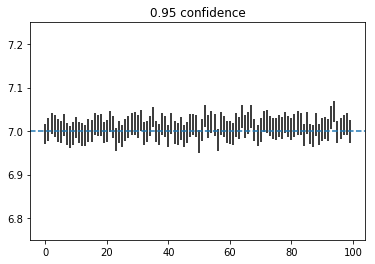

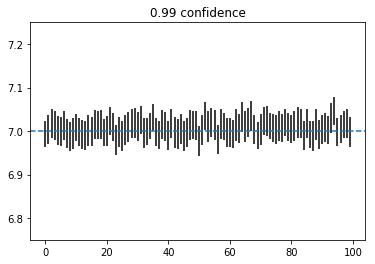

In [83]:
plot_confidence(n=300, xm = XM, alpha = 7)

In the majority of times, the actual parameter falls within the confidence interval.